In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lib.shared.file_utils import get_filename
from lib.shared.configuration_utils import plot_combined_tile_grid

## SET PARAMETERS

### Fixed parameters for preprocessing

- `CONFIG_FILE_PATH`: Path to a Brieflow config file used during processing*.
- `ROOT_FP`: Path to root of Brieflow output directory*.

*Note: Paths can be absolute or relative to where workflows are run from.

In [2]:
CONFIG_FILE_PATH = "config/config.yml"
ROOT_FP = "analysis_root/"

### Generate maps of metadata, and check if initial sites is a logical choice

In [3]:
# TODO: Figure out good way to use testing data for example analysis...
# for now just use copied files from denali screen

TEST_WELL = "B1"
TEST_CYCLE = 1

Phenotype metadata:


,x_pos,y_pos,z_data,pfs_offset,tile,filename
0,42654.6,2273.5,3139.56,10199,0,/lab/barcheese01/screens/denali/input_ph/20240...
1,41913.5,2279.1,3139.52,10199,1,/lab/barcheese01/screens/denali/input_ph/20240...
2,41172.5,2285.2,3139.50,10199,2,/lab/barcheese01/screens/denali/input_ph/20240...
3,40431.7,2290.9,3139.50,10199,3,/lab/barcheese01/screens/denali/input_ph/20240...
4,39690.6,2296.9,3139.56,10199,4,/lab/barcheese01/screens/denali/input_ph/20240...
...,...,...,...,...,...,...
1600,38470.0,34911.9,3166.48,10199,1600,/lab/barcheese01/screens/denali/input_ph/20240...
1601,37728.9,34917.6,3166.58,10199,1601,/lab/barcheese01/screens/denali/input_ph/20240...
1602,36988.0,34923.4,3166.56,10199,1602,/lab/barcheese01/screens/denali/input_ph/20240...
1603,36246.9,34929.6,3166.54,10199,1603,/lab/barcheese01/screens/denali/input_ph/20240...


SBS metadata:


,x_pos,y_pos,z_pos,pfs_offset,tile,filename
0,38953.7,2305.9,3121.78,8063,0,/lab/barcheese01/screens/denali/input_sbs/c1/P...
1,33037.5,3835.2,3120.10,8063,1,/lab/barcheese01/screens/denali/input_sbs/c1/P...
2,34519.6,3823.1,3120.14,8063,2,/lab/barcheese01/screens/denali/input_sbs/c1/P...
3,36001.5,3811.2,3120.12,8063,3,/lab/barcheese01/screens/denali/input_sbs/c1/P...
4,37483.4,3799.5,3120.14,8063,4,/lab/barcheese01/screens/denali/input_sbs/c1/P...
...,...,...,...,...,...,...
372,40684.8,33415.1,3145.72,8063,372,/lab/barcheese01/screens/denali/input_sbs/c1/P...
373,42166.7,33402.8,3145.70,8063,373,/lab/barcheese01/screens/denali/input_sbs/c1/P...
374,43648.9,33391.0,3145.70,8063,374,/lab/barcheese01/screens/denali/input_sbs/c1/P...
375,45130.8,33379.0,3145.72,8063,375,/lab/barcheese01/screens/denali/input_sbs/c1/P...


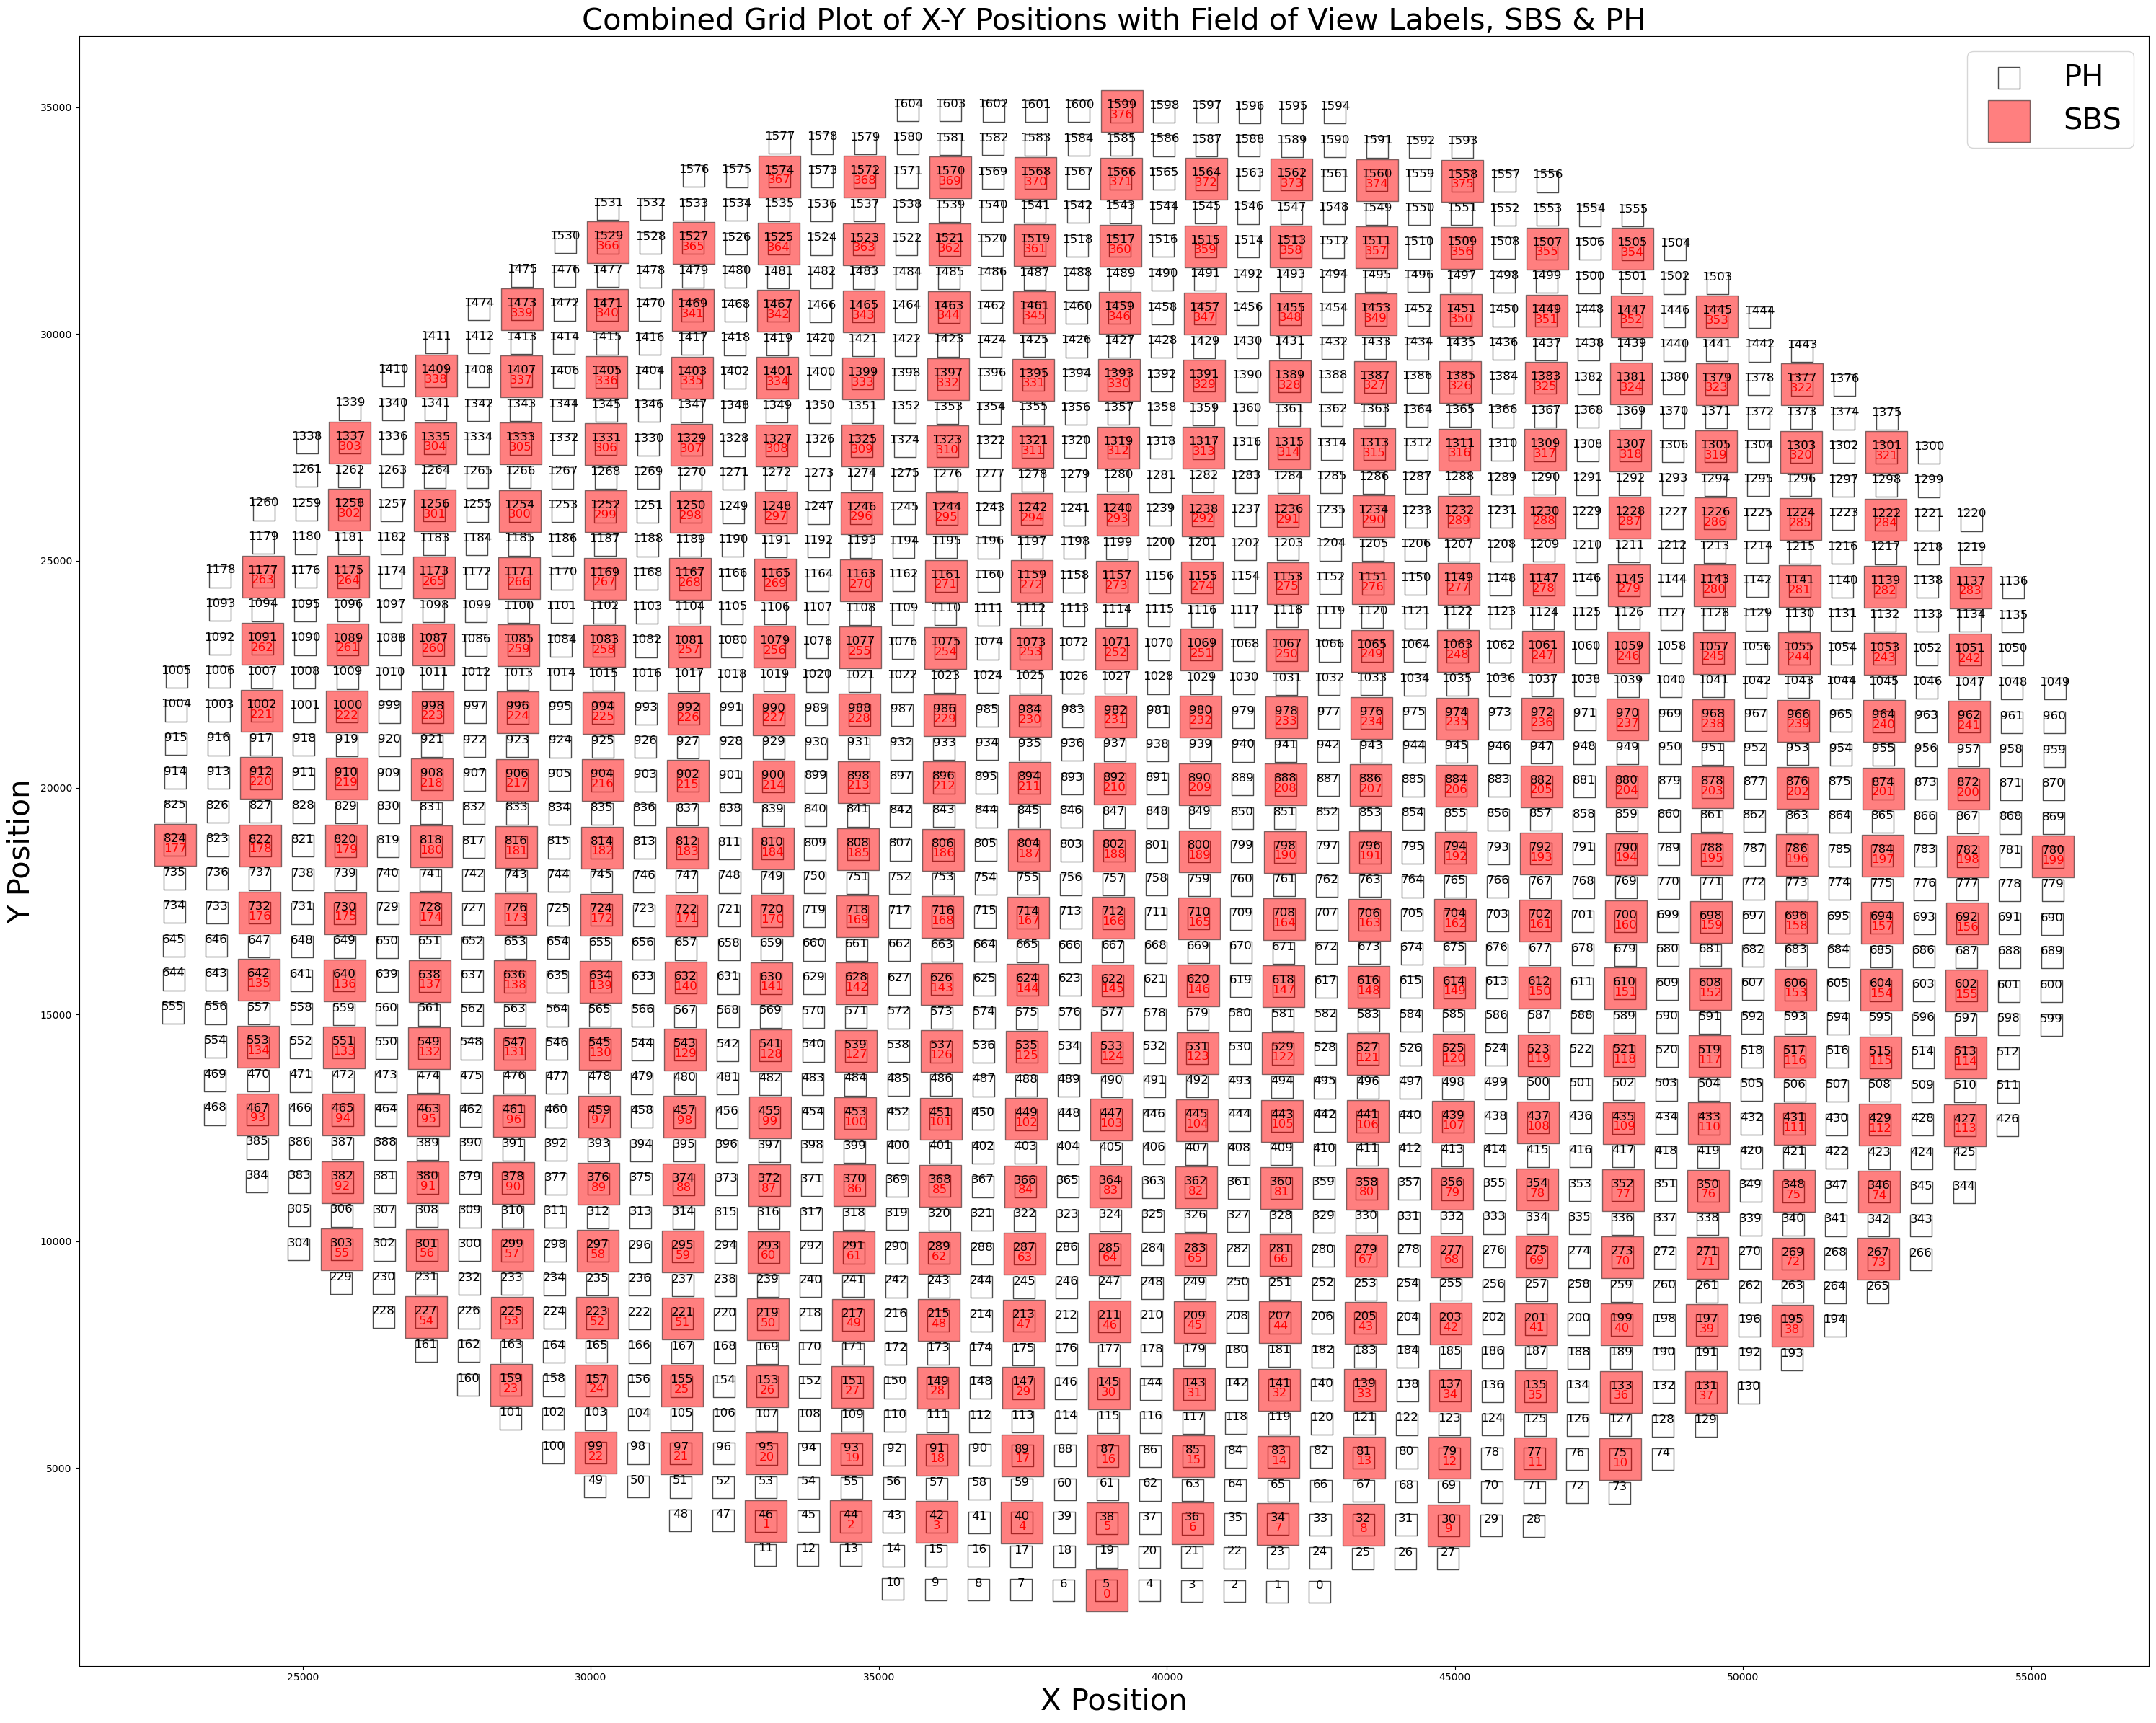

In [4]:
ph_test_metadata_fp = f"{ROOT_FP}/preprocess/metadata/phenotype/" + get_filename(
    {"well": TEST_WELL}, "combined_metadata", "tsv"
)
ph_test_metadata = pd.read_csv(ph_test_metadata_fp, sep="\t")
print("Phenotype metadata:")
display(ph_test_metadata)

sbs_test_metadata_fp = f"{ROOT_FP}/preprocess/metadata/sbs/" + get_filename(
    {"well": TEST_WELL, "cycle": TEST_CYCLE}, "combined_metadata", "tsv"
)
sbs_test_metadata = pd.read_csv(sbs_test_metadata_fp, sep="\t")
print("SBS metadata:")
display(sbs_test_metadata)

combined_tile_grid = plot_combined_tile_grid(ph_test_metadata, sbs_test_metadata)
combined_tile_grid.show()